In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer import Pitch
import seaborn as sns

In [71]:
df = pd.read_csv('valladolidA.csv')

In [72]:
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [73]:
df = df[df['teamId']=='Barcelona']
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8


In [74]:
#now we want to find our passes and recipients and then filter for only passes
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

In [75]:
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

In [76]:
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']
average_locations

,x,y,count
passer,,,
1.0,7.124000,50.324000,25
2.0,68.274359,11.915385,39
4.0,32.895833,43.518750,48
8.0,53.332927,41.608537,82
9.0,69.916667,51.383333,6
10.0,63.201613,42.351613,62
15.0,38.409091,74.378182,55
16.0,69.594286,69.471429,35
18.0,55.242553,83.793617,47


In [77]:
#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [78]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1.0,2.0,3,7.124000,50.324000,25,68.274359,11.915385,39
1,1.0,4.0,3,7.124000,50.324000,25,32.895833,43.518750,48
2,1.0,8.0,4,7.124000,50.324000,25,53.332927,41.608537,82
3,1.0,9.0,1,7.124000,50.324000,25,69.916667,51.383333,6
4,1.0,15.0,4,7.124000,50.324000,25,38.409091,74.378182,55
...,...,...,...,...,...,...,...,...,...
85,28.0,8.0,13,49.156863,16.282353,51,53.332927,41.608537,82
86,28.0,9.0,3,49.156863,16.282353,51,69.916667,51.383333,6
87,28.0,10.0,5,49.156863,16.282353,51,63.201613,42.351613,62
88,28.0,18.0,1,49.156863,16.282353,51,55.242553,83.793617,47


In [79]:
pass_between = pass_between[pass_between['pass_count']>3]
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
2,1.0,8.0,4,7.124000,50.324000,25,53.332927,41.608537,82
4,1.0,15.0,4,7.124000,50.324000,25,38.409091,74.378182,55
11,2.0,8.0,11,68.274359,11.915385,39,53.332927,41.608537,82
13,2.0,10.0,11,68.274359,11.915385,39,63.201613,42.351613,62
15,2.0,21.0,5,68.274359,11.915385,39,55.663636,52.263636,55
16,2.0,28.0,7,68.274359,11.915385,39,49.156863,16.282353,51
17,4.0,1.0,5,32.895833,43.518750,48,7.124000,50.324000,25
19,4.0,8.0,6,32.895833,43.518750,48,53.332927,41.608537,82
21,4.0,15.0,20,32.895833,43.518750,48,38.409091,74.378182,55
23,4.0,21.0,6,32.895833,43.518750,48,55.663636,52.263636,55


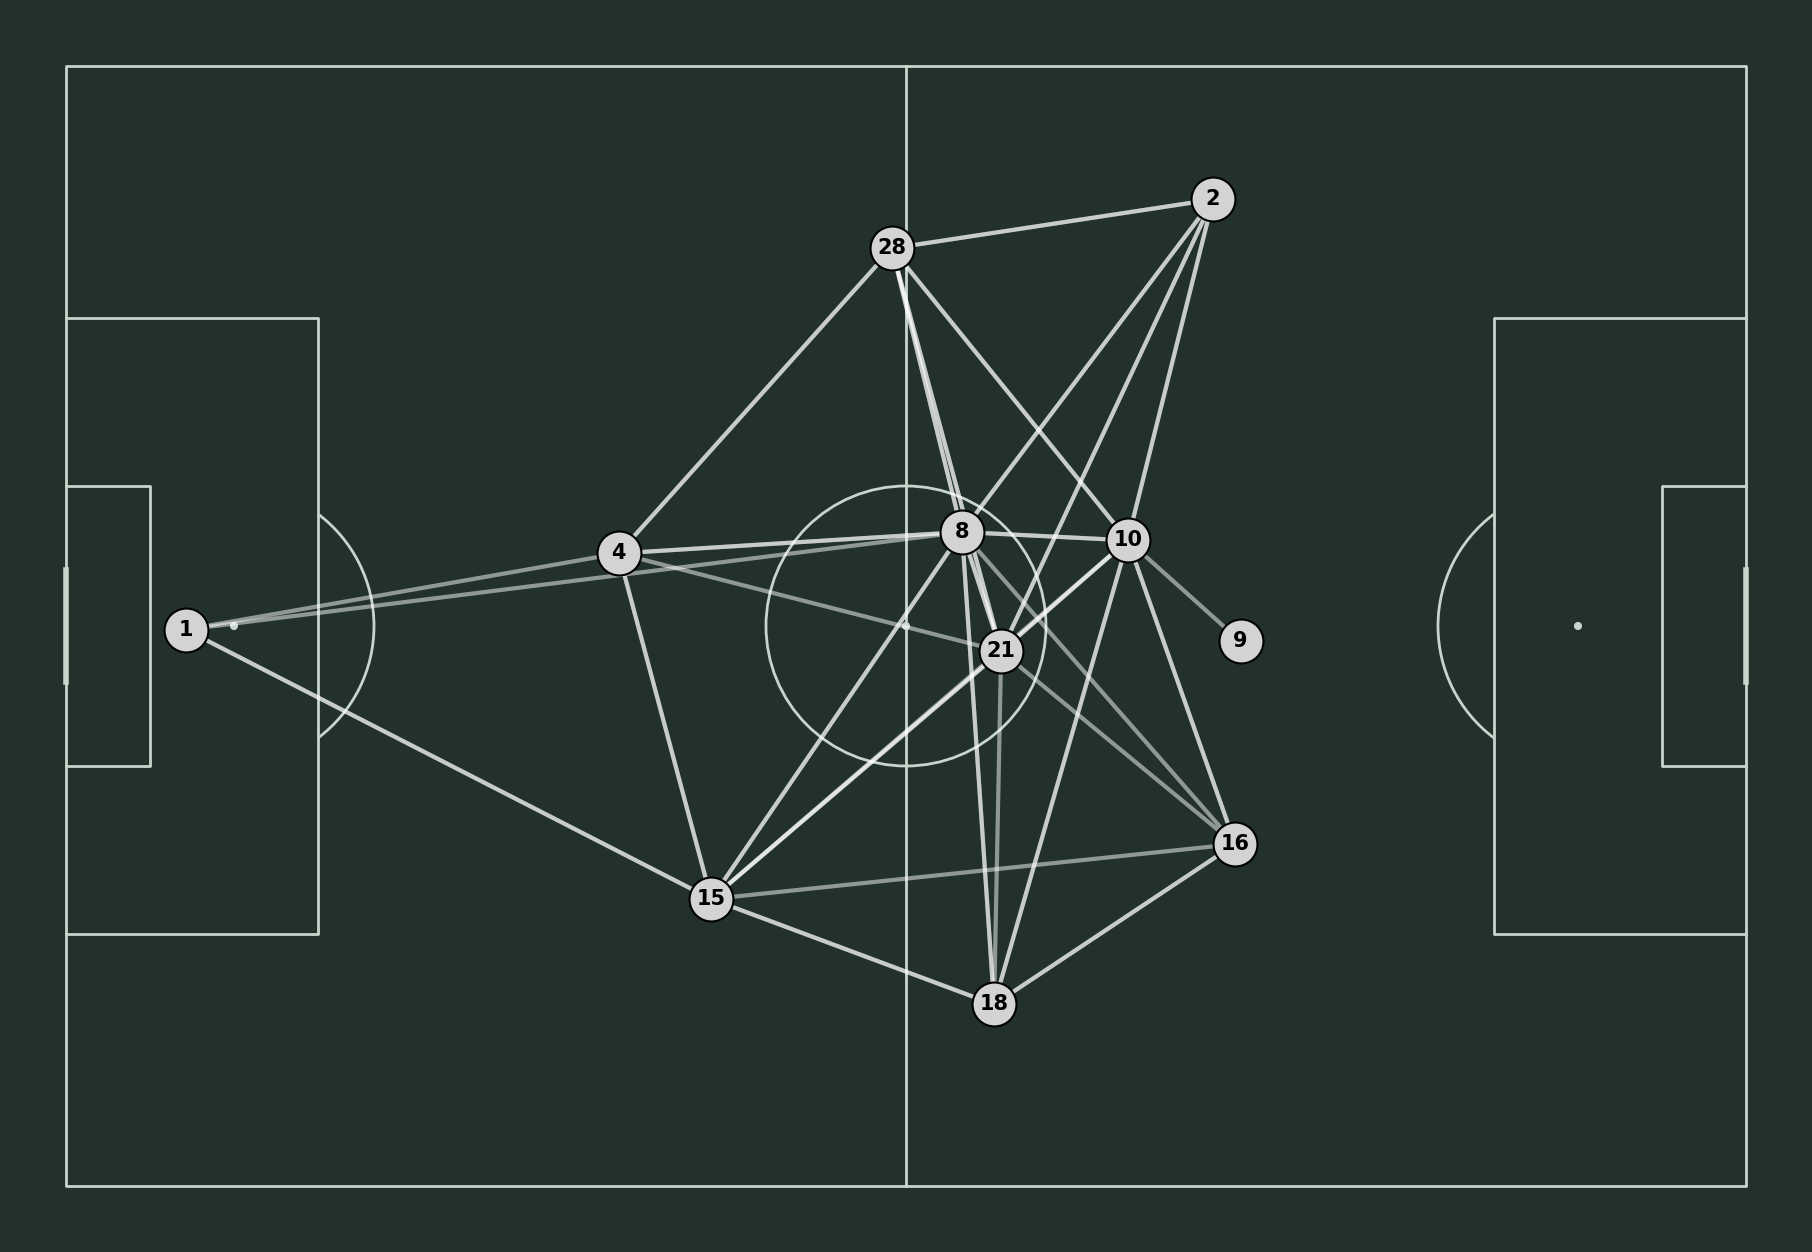

In [100]:
fig ,ax = plt.subplots(figsize=(27,16))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig.set_facecolor('#22312b')

pitch.draw(ax = ax)

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 3, headwidth = 3, color = 'w', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 1000, color = '#d3d3d3', edgecolors = 'black', linewidth = 1.5, alpha = 1, zorder = 1, ax=ax)

for player_id, row in average_locations.iterrows():
    ax.text(
        1.2 * row['x'],          # keep as float
        0.8 * row['y'],          # keep as float
        str(int(player_id)),     # label as integer
        ha='center',
        va='center',
        color='Black',
        fontsize=15,
        fontweight='bold',
        zorder=3
    )

